## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [3]:
df = pd.read_csv("QueryResults.csv", names=["Date", "Language", "Post Count"])
df

,Date,Language,Post Count
0,m,TagName,NaN
1,2008-07-01 00:00:00,c#,3.0
2,2008-08-01 00:00:00,assembly,8.0
3,2008-08-01 00:00:00,c,83.0
4,2008-08-01 00:00:00,c#,505.0
...,...,...,...
2506,2023-08-01 00:00:00,php,1940.0
2507,2023-08-01 00:00:00,python,10861.0
2508,2023-08-01 00:00:00,r,2407.0
2509,2023-08-01 00:00:00,ruby,212.0


**Challenge**: Examine the first 5 rows and the last 5 rows of the dataframe

In [4]:
clean_df = df.dropna()
clean_df.tail()

,Date,Language,Post Count
2506,2023-08-01 00:00:00,php,1940.0
2507,2023-08-01 00:00:00,python,10861.0
2508,2023-08-01 00:00:00,r,2407.0
2509,2023-08-01 00:00:00,ruby,212.0
2510,2023-08-01 00:00:00,swift,1033.0


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [5]:
clean_df.shape

(2510, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [6]:
clean_df.count()

Date          2510
Language      2510
Post Count    2510
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [7]:
aggregated_df = clean_df.groupby("Language")
aggregated_df.sum()

C:\Users\Igor\AppData\Local\Temp\ipykernel_28324\827052859.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aggregated_df.sum()


,Post Count
Language,
assembly,43193.0
c,398744.0
c#,1600155.0
c++,798073.0
delphi,51181.0
go,70522.0
java,1904287.0
javascript,2507957.0
perl,67804.0


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [8]:
aggregated_df.count()

,Date,Post Count
Language,,
assembly,181,181
c,181,181
c#,182,182
c++,181,181
delphi,181,181
go,166,166
java,181,181
javascript,181,181
perl,181,181


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [9]:
clean_df["Date"] = pd.to_datetime(clean_df["Date"])
clean_df.head()

C:\Users\Igor\AppData\Local\Temp\ipykernel_28324\2268027453.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df["Date"] = pd.to_datetime(clean_df["Date"])


,Date,Language,Post Count
1,2008-07-01,c#,3.0
2,2008-08-01,assembly,8.0
3,2008-08-01,c,83.0
4,2008-08-01,c#,505.0
5,2008-08-01,c++,164.0


## Data Manipulation



In [12]:
reshaped_df = clean_df.pivot(index="Date", columns="Language", values="Post Count").fillna(0)
reshaped_df

Language,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Date,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,83.0,505.0,164.0,14.0,0.0,222.0,163.0,28.0,158.0,120.0,0.0,70.0,0.0
2008-09-01,28.0,320.0,1641.0,754.0,104.0,0.0,1129.0,634.0,130.0,475.0,537.0,6.0,286.0,0.0
2008-10-01,16.0,302.0,1988.0,807.0,112.0,0.0,1149.0,722.0,128.0,610.0,506.0,0.0,247.0,0.0
2008-11-01,16.0,258.0,1731.0,734.0,141.0,0.0,955.0,580.0,97.0,499.0,449.0,1.0,157.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-01,197.0,1186.0,3841.0,1966.0,121.0,514.0,4477.0,8298.0,56.0,1935.0,12431.0,3099.0,220.0,1092.0
2023-05-01,175.0,1049.0,3835.0,1782.0,114.0,420.0,4186.0,7780.0,54.0,1972.0,11807.0,2865.0,255.0,998.0
2023-06-01,155.0,891.0,3822.0,1817.0,117.0,522.0,4299.0,7551.0,54.0,1914.0,11300.0,2668.0,226.0,1134.0


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [13]:
reshaped_df.shape

(182, 14)

In [14]:
reshaped_df.head()

Language,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Date,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,83.0,505.0,164.0,14.0,0.0,222.0,163.0,28.0,158.0,120.0,0.0,70.0,0.0
2008-09-01,28.0,320.0,1641.0,754.0,104.0,0.0,1129.0,634.0,130.0,475.0,537.0,6.0,286.0,0.0
2008-10-01,16.0,302.0,1988.0,807.0,112.0,0.0,1149.0,722.0,128.0,610.0,506.0,0.0,247.0,0.0
2008-11-01,16.0,258.0,1731.0,734.0,141.0,0.0,955.0,580.0,97.0,499.0,449.0,1.0,157.0,0.0


In [15]:
reshaped_df.tail()

Language,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Date,,,,,,,,,,,,,,
2023-04-01,197.0,1186.0,3841.0,1966.0,121.0,514.0,4477.0,8298.0,56.0,1935.0,12431.0,3099.0,220.0,1092.0
2023-05-01,175.0,1049.0,3835.0,1782.0,114.0,420.0,4186.0,7780.0,54.0,1972.0,11807.0,2865.0,255.0,998.0
2023-06-01,155.0,891.0,3822.0,1817.0,117.0,522.0,4299.0,7551.0,54.0,1914.0,11300.0,2668.0,226.0,1134.0
2023-07-01,165.0,918.0,3885.0,1863.0,99.0,526.0,4090.0,7564.0,69.0,1762.0,11207.0,2368.0,225.0,1159.0
2023-08-01,151.0,906.0,3828.0,1770.0,107.0,524.0,4068.0,7146.0,52.0,1940.0,10861.0,2407.0,212.0,1033.0


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [19]:
reshaped_df.count()

Language
assembly      182
c             182
c#            182
c++           182
delphi        182
go            182
java          182
javascript    182
perl          182
php           182
python        182
r             182
ruby          182
swift         182
dtype: int64

In [20]:
count = reshaped_df.sum()
count

Language
assembly        43193.0
c              398744.0
c#            1600155.0
c++            798073.0
delphi          51181.0
go              70522.0
java          1904287.0
javascript    2507957.0
perl            67804.0
php           1460681.0
python        2157668.0
r              495981.0
ruby           228327.0
swift          329545.0
dtype: float64

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

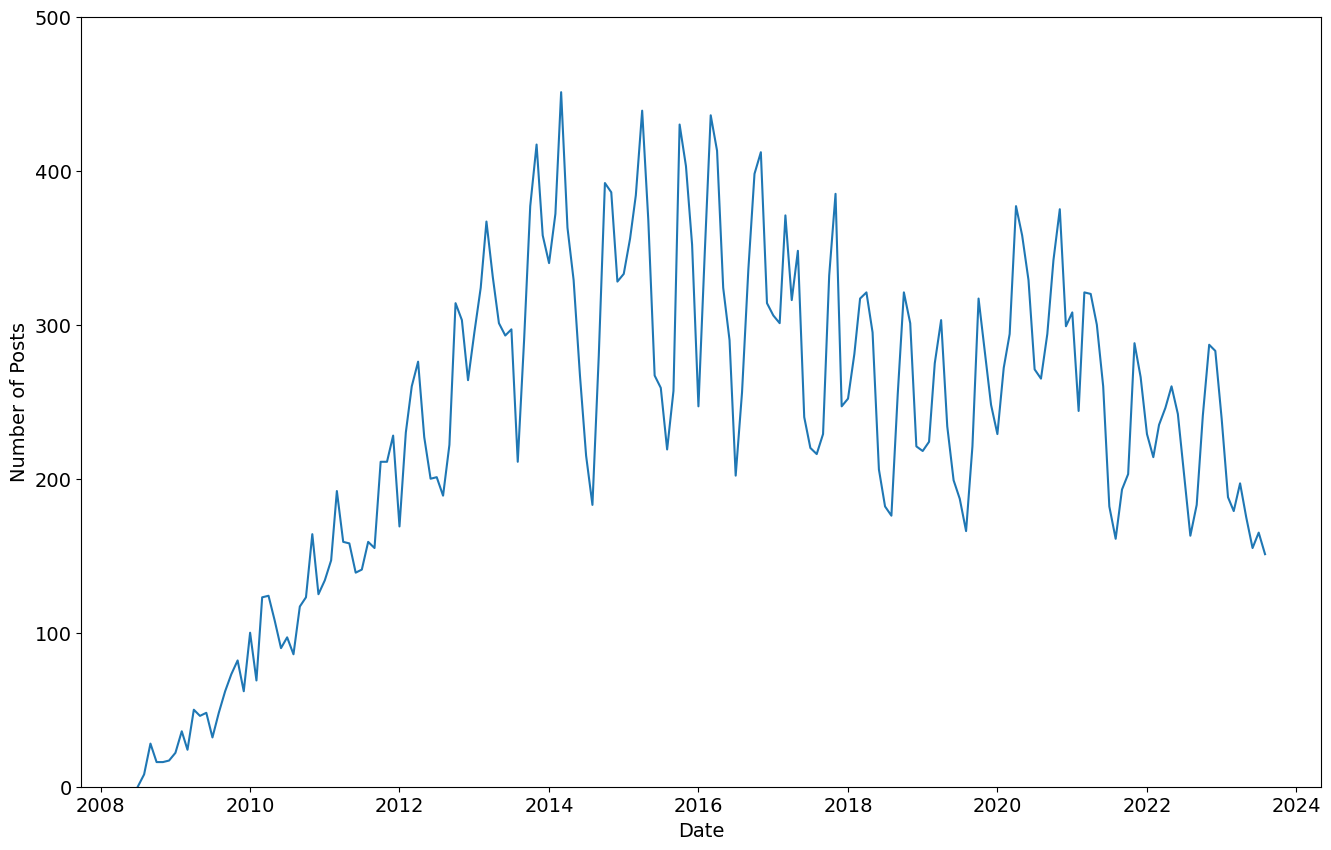

In [34]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0, 500)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Posts", fontsize=14)
plt.plot(reshaped_df.index, reshaped_df["assembly"])

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

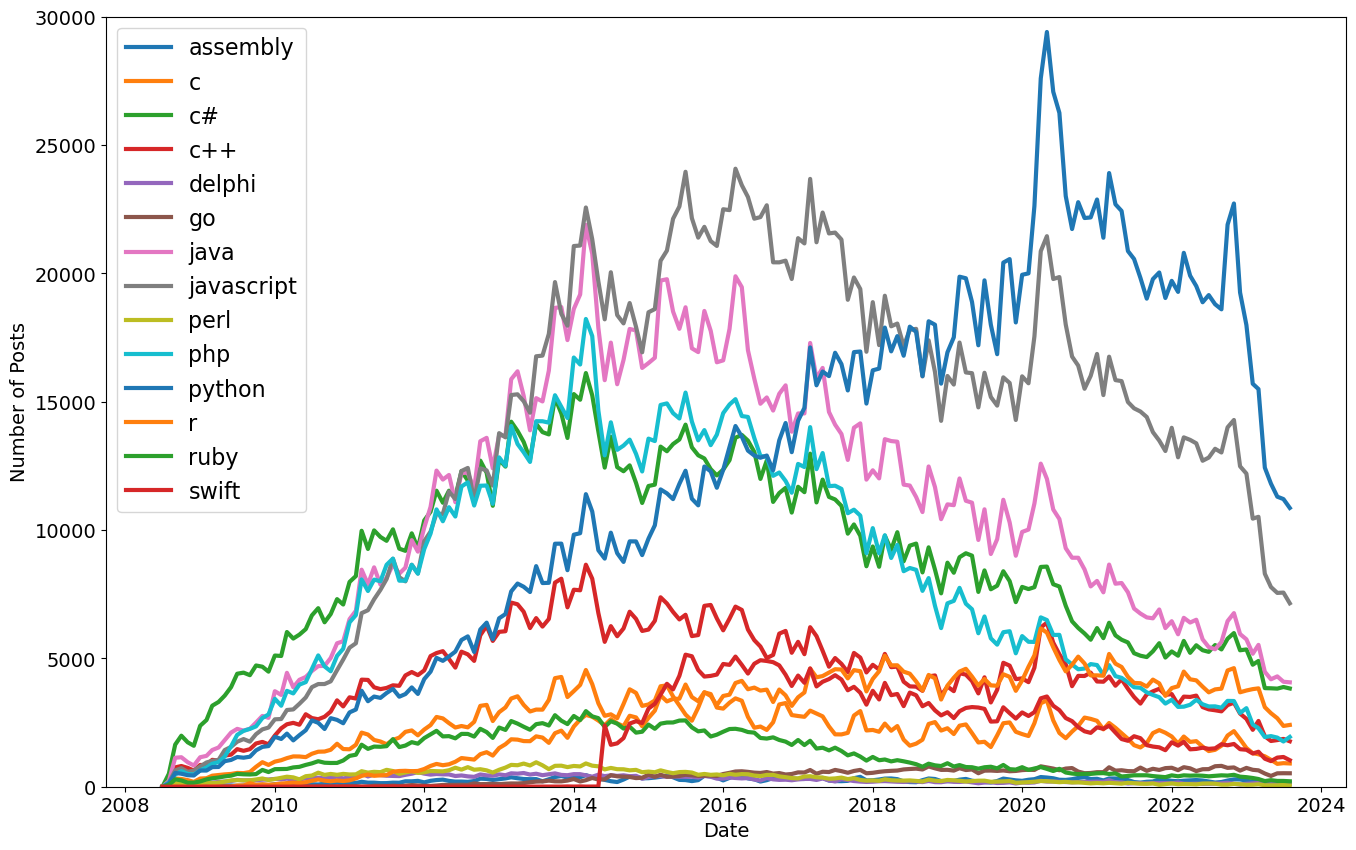

In [47]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0, 30000)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Posts", fontsize=14)
for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column], linewidth=3, label=reshaped_df[column].name)
plt.legend(fontsize=16)

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

In [48]:
roll_df = reshaped_df.rolling(window=6).mean()
roll_df

Language,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Date,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-01,228.833333,1547.333333,5024.500000,2585.500000,118.666667,653.666667,5606.166667,11372.000000,85.000000,2651.000000,17264.833333,3797.000000,348.000000,1386.166667
2023-05-01,210.166667,1361.166667,4665.833333,2336.833333,118.500000,598.500000,5176.666667,10287.333333,75.666667,2423.166667,15445.500000,3504.500000,313.166667,1274.833333
2023-06-01,188.833333,1201.166667,4416.833333,2164.666667,123.666667,581.000000,4901.833333,9465.000000,68.833333,2263.500000,14119.500000,3336.000000,285.500000,1220.166667


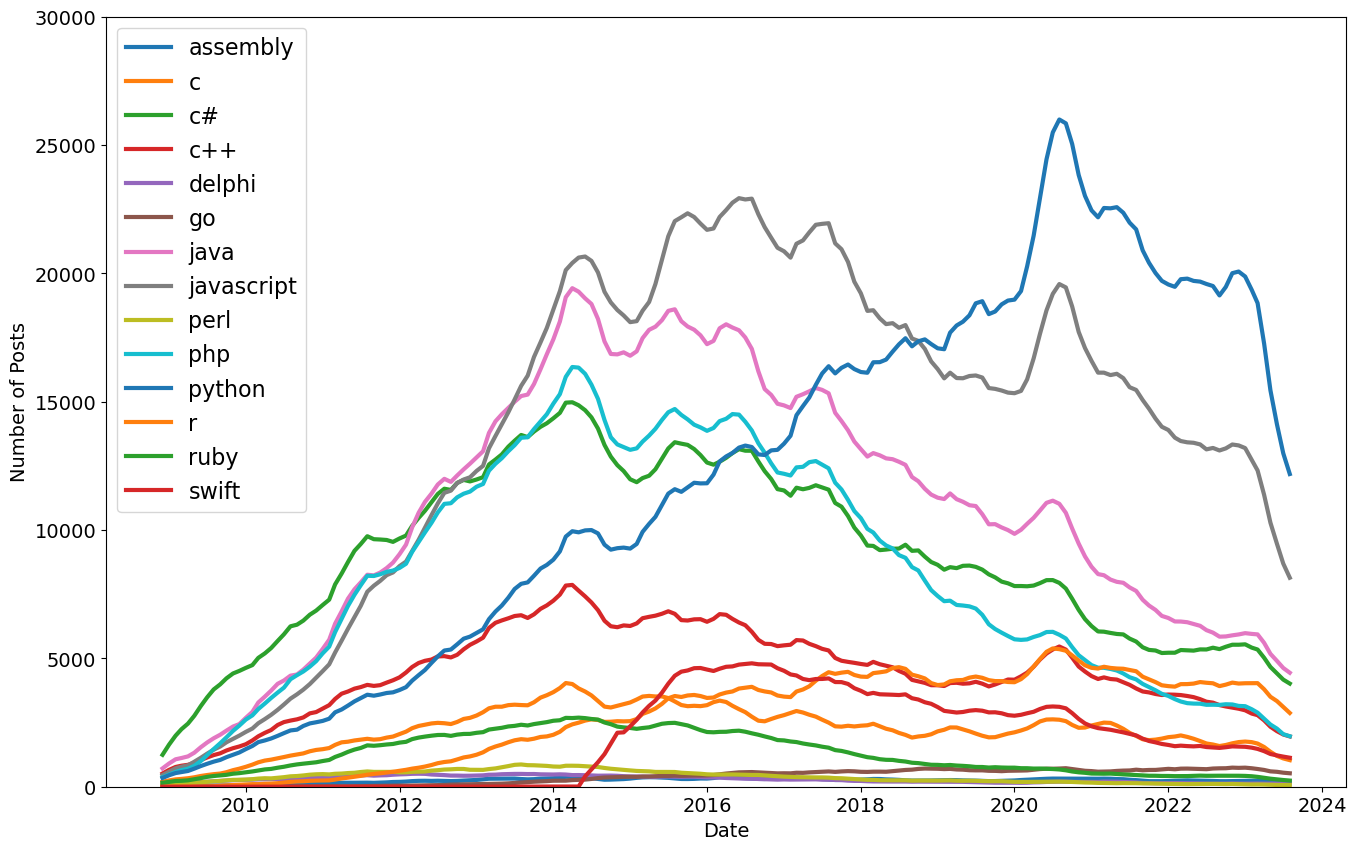

In [49]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0, 30000)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Posts", fontsize=14)
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], linewidth=3, label=roll_df[column].name)
plt.legend(fontsize=16)

In [50]:
roll3_df = reshaped_df.rolling(window=3).mean()
roll3_df

Language,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Date,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-09-01,12.000000,134.333333,716.333333,306.000000,39.333333,0.000000,450.333333,265.666667,52.666667,211.000000,219.000000,2.000000,118.666667,0.000000
2008-10-01,17.333333,235.000000,1378.000000,575.000000,76.666667,0.000000,833.333333,506.333333,95.333333,414.333333,387.666667,2.000000,201.000000,0.000000
2008-11-01,20.000000,293.333333,1786.666667,765.000000,119.000000,0.000000,1077.666667,645.333333,118.333333,528.000000,497.333333,2.333333,230.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-01,188.000000,1252.666667,4498.333333,2248.333333,132.333333,603.666667,5061.333333,9753.000000,76.666667,2211.333333,14541.000000,3578.000000,286.666667,1249.666667
2023-05-01,183.666667,1166.333333,4192.333333,2103.333333,126.000000,524.000000,4729.666667,8864.666667,68.333333,2062.000000,13243.333333,3265.333333,258.333333,1151.000000
2023-06-01,175.666667,1042.000000,3832.666667,1855.000000,117.333333,485.333333,4320.666667,7876.333333,54.666667,1940.333333,11846.000000,2877.333333,233.666667,1074.666667


## Quiz

1. Looking at the data, what was the most popular programming language from 2008 to 2012 by the number of posts?

In [58]:
from_2008_to_2012_df = reshaped_df.loc[(reshaped_df.index.year <= 2012)]
from_2008_to_2012_df.idxmax(axis=1)

Date
2008-07-01            c#
2008-08-01            c#
2008-09-01            c#
2008-10-01            c#
2008-11-01            c#
2008-12-01            c#
2009-01-01            c#
2009-02-01            c#
2009-03-01            c#
2009-04-01            c#
2009-05-01            c#
2009-06-01            c#
2009-07-01            c#
2009-08-01            c#
2009-09-01            c#
2009-10-01            c#
2009-11-01            c#
2009-12-01            c#
2010-01-01            c#
2010-02-01            c#
2010-03-01            c#
2010-04-01            c#
2010-05-01            c#
2010-06-01            c#
2010-07-01            c#
2010-08-01            c#
2010-09-01            c#
2010-10-01            c#
2010-11-01            c#
2010-12-01            c#
2011-01-01            c#
2011-02-01            c#
2011-03-01            c#
2011-04-01            c#
2011-05-01            c#
2011-06-01            c#
2011-07-01            c#
2011-08-01            c#
2011-09-01            c#
2011-10-01          

2. What was the most popular programming language from 2015 to 2018?

In [64]:
from_2015_to_2018_df = reshaped_df.loc[(2018 >= reshaped_df.index.year) & (2015 <= reshaped_df.index.year)]
from_2015_to_2018_df.idxmax(axis=1)

Date
2015-01-01    javascript
2015-02-01    javascript
2015-03-01    javascript
2015-04-01    javascript
2015-05-01    javascript
2015-06-01    javascript
2015-07-01    javascript
2015-08-01    javascript
2015-09-01    javascript
2015-10-01    javascript
2015-11-01    javascript
2015-12-01    javascript
2016-01-01    javascript
2016-02-01    javascript
2016-03-01    javascript
2016-04-01    javascript
2016-05-01    javascript
2016-06-01    javascript
2016-07-01    javascript
2016-08-01    javascript
2016-09-01    javascript
2016-10-01    javascript
2016-11-01    javascript
2016-12-01    javascript
2017-01-01    javascript
2017-02-01    javascript
2017-03-01    javascript
2017-04-01    javascript
2017-05-01    javascript
2017-06-01    javascript
2017-07-01    javascript
2017-08-01    javascript
2017-09-01    javascript
2017-10-01    javascript
2017-11-01    javascript
2017-12-01    javascript
2018-01-01    javascript
2018-02-01    javascript
2018-03-01    javascript
2018-04-01    javasc

In [65]:
_2020_df = reshaped_df.loc[(reshaped_df.index.year == 2020)]
_2020_df.idxmax(axis=1)

Date
2020-01-01    python
2020-02-01    python
2020-03-01    python
2020-04-01    python
2020-05-01    python
2020-06-01    python
2020-07-01    python
2020-08-01    python
2020-09-01    python
2020-10-01    python
2020-11-01    python
2020-12-01    python
dtype: object